In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pantarei as rei
from src.simulation_module import simulation, plot_val_over_NMC, visualize_3dmol

# simulation = rei.Task(simulation,clear_first=True)

# job = rei.Job(simulation)

scheduler = rei.scheduler.ThreadScheduler(backend='process')
job = rei.Thread(simulation, scheduler=scheduler)

In [24]:
rei.report()

✅ ended   100% [24/24]
   ✅ simulation/75a14532680e3101893dd681f33c8de6 0:13:43 simulation(param_interact=None,param_sys=None,mc_par_over_box=0.1,temperature=1.5,density=0.05,s ...
   ✅ simulation/1585fa5548684d2435e963e1d028f8e7 0:13:47 simulation(param_interact=None,param_sys=None,mc_par_over_box=0.1,temperature=1.5,density=0.1,st ...
   ✅ simulation/4e205068c0e7f8939f266308478b7f2f 0:13:51 simulation(param_interact=None,param_sys=None,mc_par_over_box=0.1,temperature=1.5,density=0.15,s ...
   ✅ simulation/c114b4a316071d18b0a1d7d452bdd7cf 0:13:58 simulation(param_interact=None,param_sys=None,mc_par_over_box=0.1,temperature=1.5,density=0.2,st ...
   ✅ simulation/d038a16bfa6c3fd42dfb3807db45ce63 0:11:59 simulation(param_interact=None,param_sys=None,mc_par_over_box=0.1,temperature=1.5,density=0.25,s ...
   ✅ simulation/af41eb230cda341ab3691a7dc8281dec 0:12:01 simulation(param_interact=None,param_sys=None,mc_par_over_box=0.1,temperature=1.5,density=0.3,st ...
   ✅ simulation/ae11cec970971

In [19]:
T = 1.
T = 1.5
d = 0.85
d = 0.9
d = 1.2

burnin = int(2.5e4/100)
P = []
r_vals = []
m_vals = []

phase_change = [0.85, 1.]
densities = [0.05,0.2,0.35,0.5,0.6,0.7,0.75,0.8,0.85,0.9,0.95,1.,1.1,1.2]
densities += [0.1,0.15,0.25,0.3,0.4,0.45,0.55,0.65,0.92,0.97]
densities.sort()
# densities = [0.2,0.9,1.2]
# densities = [0.35]
for d in densities:
    data = job(temperature=T,density=d,steps=5e4,burnin_steps=0,mc_par_over_box=0.1)


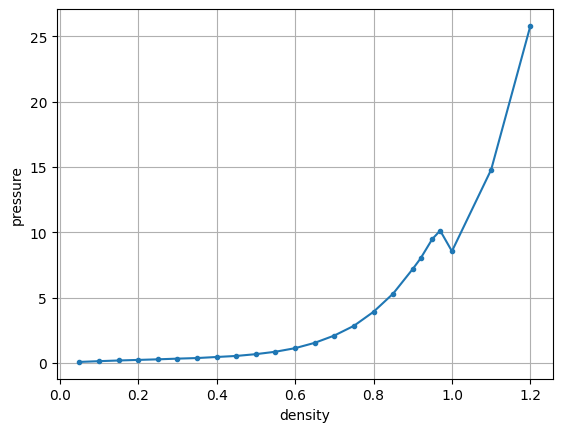

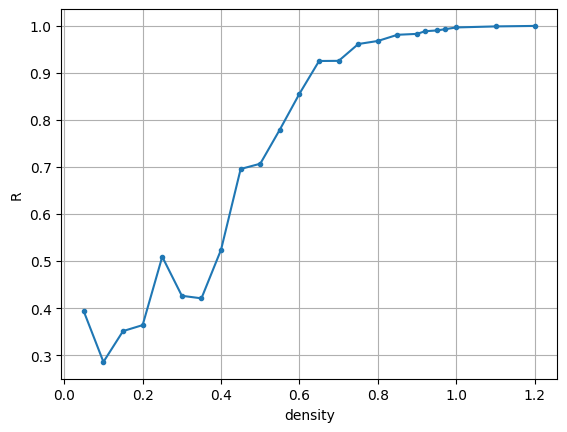

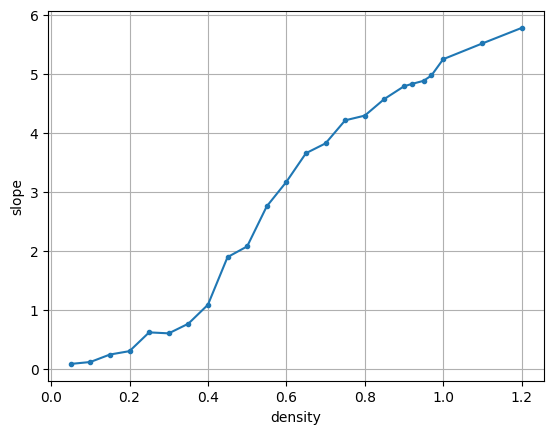

In [25]:

for d in densities:
    # if d<phase_change[1]:
    #     data = simulation(temperature=T,density=d,steps=1e4,burnin_steps=0,mc_par_over_box=0.15)
    # elif d>phase_change[1]:
    #     data = simulation(temperature=T,density=d,steps=1e4,burnin_steps=0,mc_par_over_box=0.05)
    # else:
    #     data = simulation(temperature=T,density=d,steps=1e4,burnin_steps=0,mc_par_over_box=0.1)
    # simulation.scheduler.wait()

    # data = simulation(temperature=T,density=d,steps=5e4,burnin_steps=0,mc_par_over_box=0.1)
    data = job(temperature=T,density=d,steps=5e4,burnin_steps=0,mc_par_over_box=0.1)
    # job.scheduler.wait()
    # print(d,data['accept_ratio'])
    # print(f'density {d:.3}: done')
    
    # positions = np.array(data['positions'][-1]).T
    # box = np.array(data['box'])
    # visualize_3dmol(positions,cell=box,radius=0.4)


    P.append(data['mean_pressure'])

    
    from scipy import stats
    energy = data['energy']
    virial = data['virial']
    linear_regression = stats.linregress(energy[burnin:],virial[burnin:])
    m, q, r = linear_regression[0], linear_regression[1], linear_regression[2]
    r_vals.append(r)
    m_vals.append(m)

plt.figure()
plt.plot(densities,P,'.-')
plt.xlabel('density')
plt.ylabel('pressure')
plt.grid()


plt.figure()
plt.plot(densities,r_vals,'.-')
plt.xlabel('density')
plt.ylabel('R')
plt.grid()


plt.figure()
plt.plot(densities,m_vals,'.-')
plt.xlabel('density')
plt.ylabel('slope')
plt.grid()



In [24]:
t = 76
n = 256
t_red = t/1e4/n
t_red

# t_red*n*5e4 / 60 * len(densities) # 89'

25*60/5e4/n/10

1.171875e-05

In [48]:
rei.report()

✅ ended   100% [24/24]
   ✅ simulation/ca1d69df64e42e31e357fec3c834d26f 0:04:47 simulation(param_interact=None,param_sys=None,mc_par_over_box=0.1,temperature=1.0,density=0.05,s ...
   ✅ simulation/f89af620e85900e51e86b4d2e359bddf 0:05:15 simulation(param_interact=None,param_sys=None,mc_par_over_box=0.1,temperature=1.0,density=0.2,st ...
   ✅ simulation/4e3ebb5a36cc9f893b7fde6874f6e119 0:05:10 simulation(param_interact=None,param_sys=None,mc_par_over_box=0.1,temperature=1.0,density=0.35,s ...
   ✅ simulation/453c650e851514885d5d06d079c27837 0:06:04 simulation(param_interact=None,param_sys=None,mc_par_over_box=0.1,temperature=1.0,density=0.5,st ...
   ✅ simulation/72ca52a092163f9a32bf5083b74652d6 0:13:29 simulation(param_interact=None,param_sys=None,mc_par_over_box=0.1,temperature=1.0,density=0.6,st ...
   ✅ simulation/cb5ddc5bb4091840bf801402030fabb7 0:13:30 simulation(param_interact=None,param_sys=None,mc_par_over_box=0.1,temperature=1.0,density=0.7,st ...
   ✅ simulation/e8ccb986dd0e6

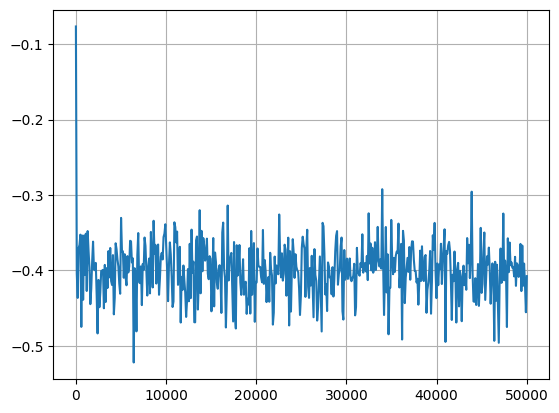

In [136]:
energy = data['energy']
pressure = data['pressure']
plot_val_over_NMC(energy,x_multipl=100)
# plot_val_over_NMC(pressure,x_multipl=100)

In [134]:
data = simulation(temperature=T,density=0.05,steps=5e4,burnin_steps=0,mc_par_over_box=0.1)
print(data['accept_ratio'])
# np.shape()
positions = np.array(data['positions'][-1]).T
box = np.array(data['box'])
# positions.shape
# print(positions[:,0,3])
# print(positions[-1,:,0] - positions[0,:,0])

visualize_3dmol(positions,cell=box,radius=0.4)

0.669609609375


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [ ]:
import time
import pantarei as rei
import random as rnd
import numpy as np

def prova(x):
    t0 = time.time()
    for _ in range(int(1e6)):
        x *= np.exp(rnd.random()*x)
    t1 = time.time()
    return t1-t0, x


# job = rei.Job(prova)

scheduler = rei.scheduler.ThreadScheduler(backend='process')
job = rei.Thread(prova, scheduler=scheduler)

# dt, x = prova(2)        # 2.5
# dt, x = job(x=2)        # 1.95
# dt, x = job(x=3)        # 1.8

dt = [0.]
# t0 = time.time()
for i in range(20):
    # data = prova(x=i)     # 36.7
    # data = job(x=i)     # 50
    data = job(x=i)     # 18
    t, x = data
    dt[0] += t

scheduler.wait()
# t1 = time.time()

print(f'{dt[0]:.4} - {t1-t0:.4}')
# print(f'{dt[0]:.4}')# - {t1-t0:.4}')




72.18 - 18.21


In [2]:
rei.report()

✅ ended    80% [16/20]
⭐ running  20% [4/20]
   ✅ prova/185e9a70bf662355983d79881877056a 0:00:06 prova(x=0)
   ✅ prova/216ec88e5485e1ae439c37d3f94cab8f 0:00:06 prova(x=1)
   ✅ prova/4e17f7f9fc6073c3d511bc12c7b6722a 0:00:05 prova(x=2)
   ✅ prova/1853daf3a769344e10cfcbdef036a8c9 0:00:04 prova(x=3)
   ✅ prova/c76efa3fc9a27578c87cd8cb8aed25f1 0:00:04 prova(x=4)
   ✅ prova/ad2f95190d24933f6a38dc9ff7cf8a57 0:00:03 prova(x=5)
   ✅ prova/7bae9cd0f3a016f19dcad6fdde400a40 0:00:02 prova(x=6)
   ✅ prova/32103625b0ee84dd54f13c1b741adab2 0:00:02 prova(x=7)
   ✅ prova/d3664c0c3431df296f98026606138b92 0:00:03 prova(x=8)
   ✅ prova/ae3868ca635bfe2867d9ba2ff55bca70 0:00:03 prova(x=9)
   ✅ prova/64a42a7863c2d31810e471e4010f6a3e 0:00:02 prova(x=10)
   ✅ prova/28a2ef728eacb08df97218688d7c3d5e 0:00:02 prova(x=11)
   ✅ prova/0f43f0e7f01aea2647cdb043603d6b92 0:00:03 prova(x=12)
   ✅ prova/bb219ebef626389b732192c25dce947e 0:00:03 prova(x=13)
   ✅ prova/1759891e60a35ae90d658bd8917c79bf 0:00:03 prova(x=14)
   ✅ 